In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

import PIL
import seaborn as sns

In [6]:
train_data_path = 'emnist-balanced-train.csv'
validation_data_path = 'emnist-balanced-test.csv'

In [107]:
train_data = pd.read_csv(train_data_path, header=None)
validation_data = pd.read_csv(validation_data_path, header=None)

# The classes of this balanced dataset are as follows. Index into it based on class label
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

In [108]:
print(train_data.shape)
print(validation_data.shape)

(112800, 785)
(18800, 785)


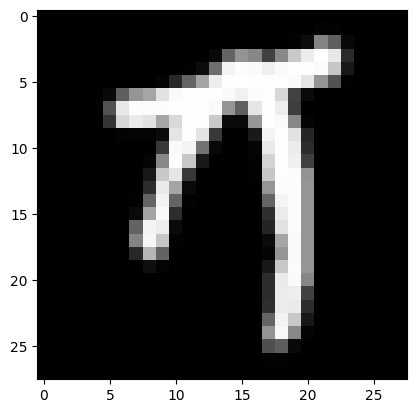

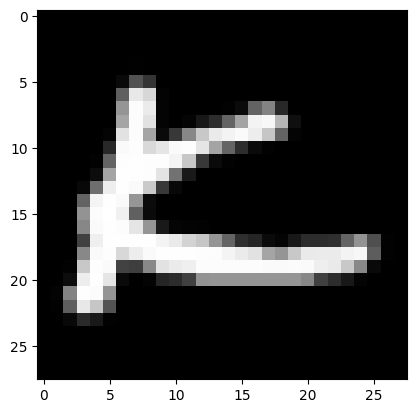

In [109]:
# Data is flipped

num_classes = len(train_data[0].unique())
row_num = 8

plt.imshow(train_data.values[row_num, 1:].reshape([28, 28]), cmap='Greys_r')
plt.show()

img_flip = np.transpose(train_data.values[row_num,1:].reshape(28, 28), axes=[1,0]) # img_size * img_size arrays
plt.imshow(img_flip, cmap='Greys_r')

plt.show()

In [110]:
train_imgs = np.transpose(train_data.values[:,1:].reshape(len(train_data), 28, 28, 1), axes=[0,2,1,3])
train_labels = tf.keras.utils.to_categorical(train_data.values[:,0], num_classes)

validation_imgs = np.transpose(validation_data.values[:,1:].reshape(len(validation_data), 28, 28, 1), axes=[0,2,1,3])
validation_labels = tf.keras.utils.to_categorical(validation_data.values[:,0], num_classes)

In [11]:
print(train_imgs.shape)
print(train_labels.shape)

print(validation_imgs.shape)
print(validation_labels.shape)

(112800, 28, 28, 1)
(112800, 47)
(18800, 28, 28, 1)
(18800, 47)


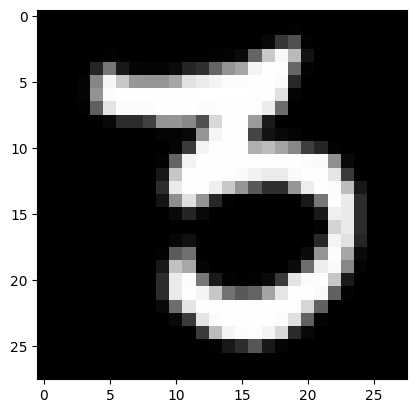

In [12]:
# Images is in right position now
row_num = 8

plt.imshow(validation_imgs[row_num], cmap='Greys_r')
plt.show()

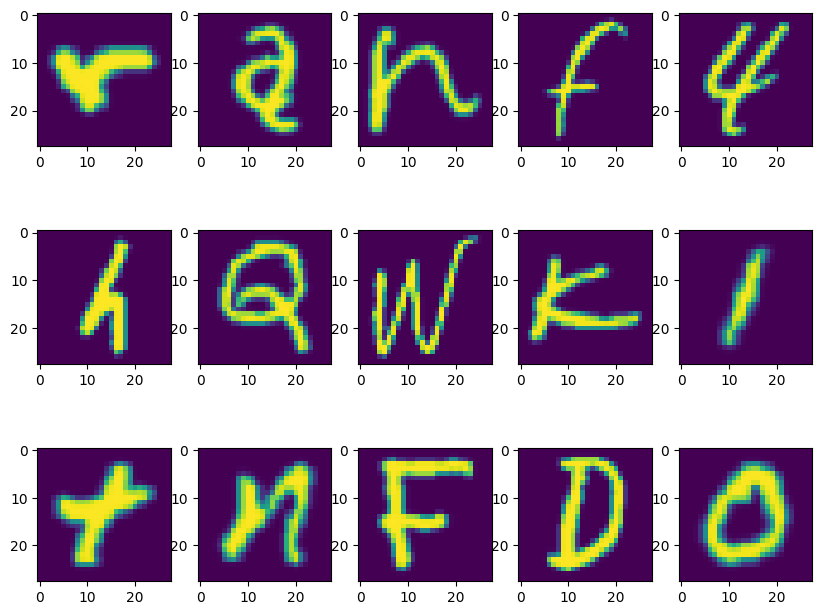

In [13]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(train_imgs[i].reshape([28,28]))

In [111]:
train_imgs = (train_imgs.astype(np.float64)) / 255
validation_imgs = (validation_imgs.astype(np.float64)) / 255

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split

In [112]:
train_x,test_x,train_y,test_y = train_test_split(train_imgs,train_labels,test_size=0.3,random_state = 42)

In [17]:
number_of_classes = 47

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [19]:
history = model.fit(train_x, train_y, epochs=25, validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/25
2468/2468 [==============================] - ETA: 0s - loss: 0.8044 - accuracy: 0.7495
Epoch 1: val_accuracy improved from -inf to 0.82663, saving model to Best_points.h5
2468/2468 [==============================] - 25s 6ms/step - loss: 0.8044 - accuracy: 0.7495 - val_loss: 0.5205 - val_accuracy: 0.8266 - lr: 0.0010
Epoch 2/25
2466/2468 [============================>.] - ETA: 0s - loss: 0.4544 - accuracy: 0.8450
Epoch 2: val_accuracy improved from 0.82663 to 0.84096, saving model to Best_points.h5
2468/2468 [==============================] - 13s 5ms/step - loss: 0.4543 - accuracy: 0.8450 - val_loss: 0.4698 - val_accuracy: 0.8410 - lr: 0.0010
Epoch 3/25
2458/2468 [============================>.] - ETA: 0s - loss: 0.3689 - accuracy: 0.8699
Epoch 3: val_accuracy did not improve from 0.84096
2468/2468 [==============================] - 13s 5ms/step - loss: 0.3690 - accuracy: 0.8698 - val_loss: 0.4995 - val_accuracy: 0.8377 - lr: 0.0010
Epoch 4/25
2460/2468 [=====================

Text(0, 0.5, 'Accuray')

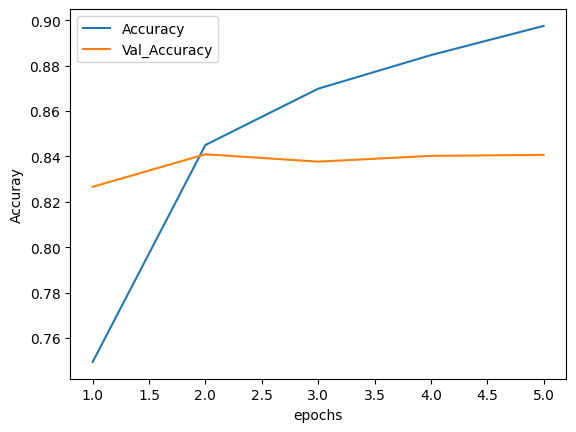

In [20]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [21]:
number_of_classes = 47

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_x, train_y, epochs=25, validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/25
2468/2468 [==============================] - ETA: 0s - loss: 0.8531 - accuracy: 0.7327
Epoch 1: val_accuracy did not improve from 0.84096
2468/2468 [==============================] - 15s 6ms/step - loss: 0.8531 - accuracy: 0.7327 - val_loss: 0.4916 - val_accuracy: 0.8324 - lr: 0.0010
Epoch 2/25
2467/2468 [============================>.] - ETA: 0s - loss: 0.4664 - accuracy: 0.8410
Epoch 2: val_accuracy improved from 0.84096 to 0.84639, saving model to Best_points.h5
2468/2468 [==============================] - 13s 5ms/step - loss: 0.4665 - accuracy: 0.8409 - val_loss: 0.4496 - val_accuracy: 0.8464 - lr: 0.0010
Epoch 3/25
2460/2468 [============================>.] - ETA: 0s - loss: 0.3940 - accuracy: 0.8638
Epoch 3: val_accuracy improved from 0.84639 to 0.85440, saving model to Best_points.h5
2468/2468 [==============================] - 13s 5ms/step - loss: 0.3940 - accuracy: 0.8637 - val_loss: 0.4329 - val_accuracy: 0.8544 - lr: 0.0010
Epoch 4/25
2464/2468 [==================

Text(0, 0.5, 'Accuray')

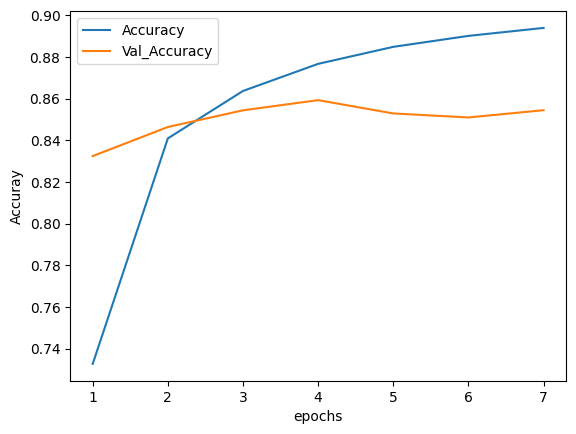

In [24]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [25]:
number_of_classes = 47

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(14,kernel_size=2,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2), # loosing data ?
    tf.keras.layers.Conv2D(28, kernel_size=2, activation='relu'),
    # tf.keras.layers.Conv2D(28,kernel_size=3,input_shape=(28,28,1), padding='valid', activation='relu'),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=6,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=6,factor=0.2,min_lr=0.0001)

In [27]:
history = model.fit(train_x, train_y, epochs=25, validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/25
2468/2468 [==============================] - ETA: 0s - loss: 0.7496 - accuracy: 0.7618
Epoch 1: val_accuracy improved from -inf to 0.83517, saving model to Best_points.h5
2468/2468 [==============================] - 16s 5ms/step - loss: 0.7496 - accuracy: 0.7618 - val_loss: 0.4834 - val_accuracy: 0.8352 - lr: 0.0010
Epoch 2/25
2467/2468 [============================>.] - ETA: 0s - loss: 0.4030 - accuracy: 0.8597
Epoch 2: val_accuracy improved from 0.83517 to 0.85056, saving model to Best_points.h5
2468/2468 [==============================] - 14s 6ms/step - loss: 0.4030 - accuracy: 0.8597 - val_loss: 0.4373 - val_accuracy: 0.8506 - lr: 0.0010
Epoch 3/25
2460/2468 [============================>.] - ETA: 0s - loss: 0.3274 - accuracy: 0.8823
Epoch 3: val_accuracy improved from 0.85056 to 0.86528, saving model to Best_points.h5
2468/2468 [==============================] - 15s 6ms/step - loss: 0.3273 - accuracy: 0.8822 - val_loss: 0.4012 - val_accuracy: 0.8653 - lr: 0.0010
Epoch 4

Text(0, 0.5, 'Accuray')

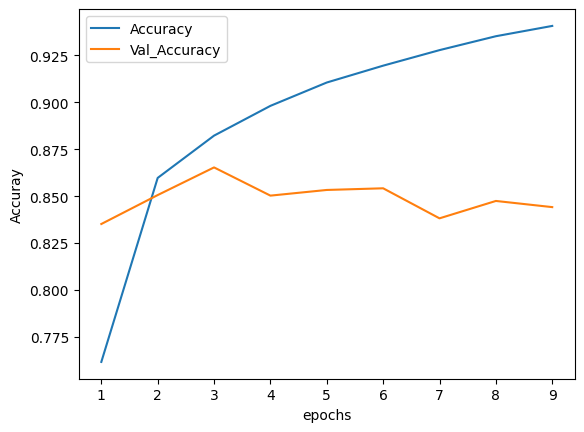

In [28]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [48]:
number_of_classes = 47

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(14,kernel_size=2,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2), # loosing data ?
    tf.keras.layers.Conv2D(28, kernel_size=2, activation='relu'),
    # tf.keras.layers.Conv2D(28,kernel_size=3,input_shape=(28,28,1), padding='valid', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(248,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=6,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=6,factor=0.2,min_lr=0.0001)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
history = model.fit(train_x, train_y, epochs=25, validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/25
2464/2468 [============================>.] - ETA: 0s - loss: 1.0103 - accuracy: 0.6848
Epoch 1: val_accuracy improved from -inf to 0.82444, saving model to Best_points.h5
2468/2468 [==============================] - 18s 6ms/step - loss: 1.0096 - accuracy: 0.6850 - val_loss: 0.5087 - val_accuracy: 0.8244 - lr: 0.0010
Epoch 2/25
2460/2468 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.8126
Epoch 2: val_accuracy improved from 0.82444 to 0.84391, saving model to Best_points.h5
2468/2468 [==============================] - 14s 6ms/step - loss: 0.5562 - accuracy: 0.8127 - val_loss: 0.4472 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 3/25
2458/2468 [============================>.] - ETA: 0s - loss: 0.4648 - accuracy: 0.8390
Epoch 3: val_accuracy improved from 0.84391 to 0.85674, saving model to Best_points.h5
2468/2468 [==============================] - 14s 6ms/step - loss: 0.4647 - accuracy: 0.8390 - val_loss: 0.4084 - val_accuracy: 0.8567 - lr: 0.0010
Epoch 4

In [50]:
model.evaluate(validation_imgs, validation_labels)

588/588 [==============================] - 2s 3ms/step - loss: 0.4642 - accuracy: 0.8704


[0.46423599123954773, 0.8703723549842834]

In [85]:
!pip install keras-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 12.2 MB/s eta 0:00:00


In [91]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.2),
])

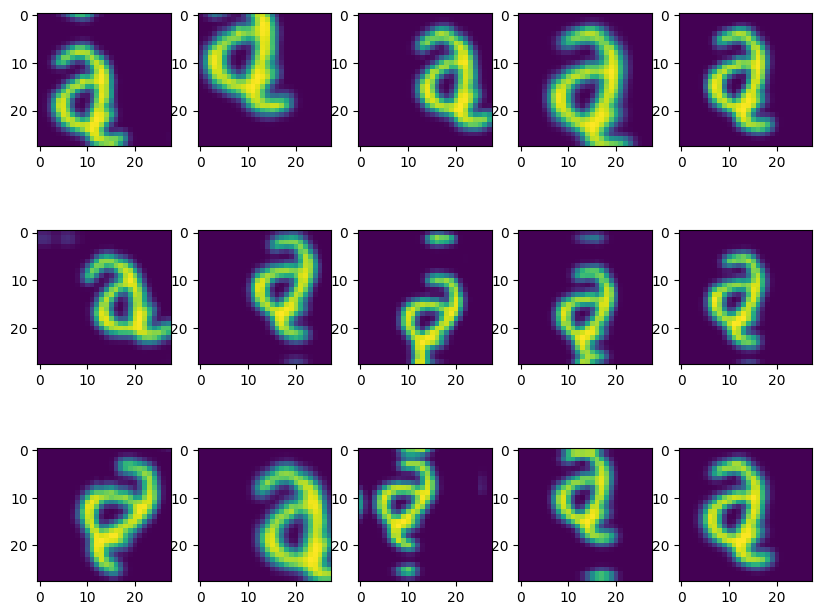

In [92]:
fig,axes = plt.subplots(3,5,figsize=(10,8))
image = train_imgs[1]
for i,ax in enumerate(axes.flat):
    augmented_image = data_augmentation(np.array([image]))[0].numpy()
    ax.imshow(augmented_image)

In [113]:
augmented_imgs = data_augmentation(train_imgs)

In [99]:
augmented_imgs.shape

TensorShape([112800, 28, 28, 1])

In [114]:
labels = np.copy(train_labels)

In [115]:
augmented_imgs = np.append(augmented_imgs, data_augmentation(train_imgs), axis=0)
labels = np.append(labels, train_labels)

train_imgs = np.append(train_imgs, augmented_imgs, axis=0)
train_labels = np.append(train_labels, labels)

del augmented_imgs
del labels

In [116]:
train_imgs.shape

(338400, 28, 28, 1)

In [124]:
number_of_classes = 47

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(14,kernel_size=2,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2), # loosing data ?
    tf.keras.layers.Conv2D(28, kernel_size=2, activation='relu'),
    tf.keras.layers.Conv2D(56, kernel_size=3),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(28,kernel_size=3,input_shape=(28,28,1), padding='valid', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(248,activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=6,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=6,factor=0.2,min_lr=0.0001)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [125]:
history = model.fit(train_x, train_y, epochs=25, validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/25
2468/2468 [==============================] - ETA: 0s - loss: 0.8248 - accuracy: 0.7417
Epoch 1: val_accuracy improved from -inf to 0.84394, saving model to Best_points.h5
2468/2468 [==============================] - 21s 7ms/step - loss: 0.8248 - accuracy: 0.7417 - val_loss: 0.4502 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 2/25
2467/2468 [============================>.] - ETA: 0s - loss: 0.4731 - accuracy: 0.8378
Epoch 2: val_accuracy improved from 0.84394 to 0.86194, saving model to Best_points.h5
2468/2468 [==============================] - 16s 6ms/step - loss: 0.4732 - accuracy: 0.8377 - val_loss: 0.3946 - val_accuracy: 0.8619 - lr: 0.0010
Epoch 3/25
2460/2468 [============================>.] - ETA: 0s - loss: 0.4081 - accuracy: 0.8555
Epoch 3: val_accuracy did not improve from 0.86194
2468/2468 [==============================] - 16s 6ms/step - loss: 0.4079 - accuracy: 0.8555 - val_loss: 0.3929 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 4/25
2460/2468 [=====================

In [127]:
model.evaluate(validation_imgs, validation_labels)

588/588 [==============================] - 2s 3ms/step - loss: 0.4640 - accuracy: 0.8799


[0.46404385566711426, 0.8798936009407043]

In [126]:
history = model.fit(train_x, train_y, epochs=25, validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/25
2464/2468 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9426
Epoch 1: val_accuracy improved from 0.88570 to 0.88614, saving model to Best_points.h5
2468/2468 [==============================] - 17s 7ms/step - loss: 0.1355 - accuracy: 0.9426 - val_loss: 0.4300 - val_accuracy: 0.8861 - lr: 1.0000e-04
Epoch 2/25
2459/2468 [============================>.] - ETA: 0s - loss: 0.1298 - accuracy: 0.9449
Epoch 2: val_accuracy did not improve from 0.88614
2468/2468 [==============================] - 18s 7ms/step - loss: 0.1298 - accuracy: 0.9449 - val_loss: 0.4391 - val_accuracy: 0.8854 - lr: 1.0000e-04
Epoch 3/25
2464/2468 [============================>.] - ETA: 0s - loss: 0.1236 - accuracy: 0.9476
Epoch 3: val_accuracy did not improve from 0.88614
2468/2468 [==============================] - 16s 6ms/step - loss: 0.1236 - accuracy: 0.9476 - val_loss: 0.4640 - val_accuracy: 0.8855 - lr: 1.0000e-04
Epoch 4/25
2468/2468 [==============================] - ETA: 0s 